In [1]:
library(ggplot2)
library(maps) # De esta libreria podemos obtener algunos mapas
library(sf)
library(units)
library(dplyr)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

udunits database from /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/library/units/share/udunits/udunits2.xml


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Leyendo dataframe de morado

In [2]:
#Generando un objeto SF

morado <- st_read("CarpetaMorada/CarpetasMoradas.shp", quiet=TRUE)
print(morado)

Simple feature collection with 160 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -117.0545 ymin: 16.17588 xmax: -86.82481 ymax: 32.64118
Geodetic CRS:  WGS 84
First 10 features:
           ENTIDAD                  MUNICIPIO CANTIDAD  X X_1
1   AGUASCALIENTES             Aguascalientes       36 NA  NA
2   AGUASCALIENTES                   Calvillo      339 NA  NA
3   AGUASCALIENTES Pabell<U+00F3>n de Arteaga       55 NA  NA
4   AGUASCALIENTES            Tepezal<U+00E1>      252 NA  NA
5   AGUASCALIENTES  San Francisco de los Romo      660 NA  NA
6  BAJA CALIFORNIA                   Ensenada      699 NA  NA
7  BAJA CALIFORNIA                   Mexicali      300 NA  NA
8  BAJA CALIFORNIA                     Tecate      128 NA  NA
9  BAJA CALIFORNIA                    Tijuana       24 NA  NA
10 BAJA CALIFORNIA         Playas de Rosarito      237 NA  NA
                     geometry
1   POINT (-102.296 21.87982)
2  POINT (-102.7188 21.84691)
3   POINT (-10

## Creando el shapefile de México.
Para este archivo reutilice el que ya habiamos hecho en la practica de leaflet

In [3]:
estadosMex1 <- st_read("MapaMexico.geojson")

Reading layer `MapaMexico' from data source 
  `/Users/miguela.monreal/CodigosVisInfo/PracticaExamen/MapaMexico.geojson' 
  using driver `GeoJSON'
Simple feature collection with 32 features and 7 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -117.1264 ymin: 14.53401 xmax: -86.74038 ymax: 32.71877
Geodetic CRS:  WGS 84


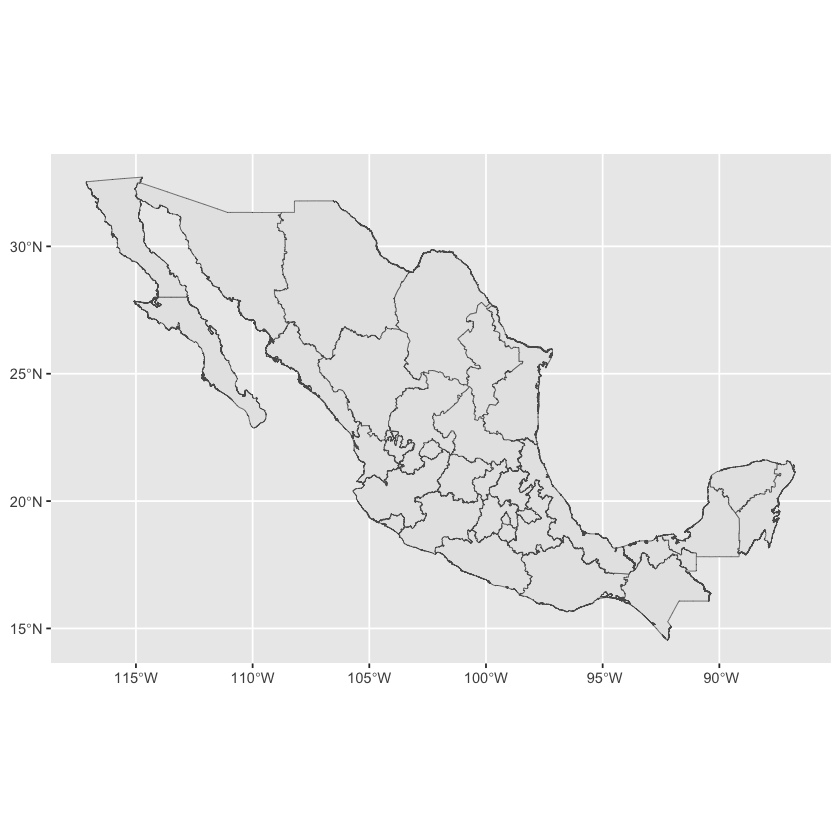

In [4]:
ggplot()+ geom_sf(data= estadosMex1)

# Desplegando el mapa
Primero del dataframe de morado lo reagrupamos para tener las ventas de los estados. Sumamos los municipios

In [5]:
#* Calculando el numero de ventas
ventas <- morado %>%
    group_by(ENTIDAD) %>%
    summarise(Total_Ventas = sum(CANTIDAD, na.rm = TRUE))
print(head(ventas))
st_crs(ventas)

Simple feature collection with 6 features and 2 fields
Geometry type: MULTIPOINT
Dimension:     XY
Bounding box:  xmin: -117.0545 ymin: 16.70796 xmax: -89.39728 ymax: 32.64118
Geodetic CRS:  WGS 84
# A tibble: 6 x 3
  ENTIDAD             Total_Ventas                                      geometry
  <chr>                      <int>                     <MULTIPOINT [arc_degree]>
1 AGUASCALIENTES              1342 ((-102.7188 21.84691), (-102.2765 22.1492), ~
2 BAJA CALIFORNIA             1388 ((-115.4756 32.64118), (-116.5951 31.80894),~
3 BAJA CALIFORNIA SUR         1449 ((-109.6947 23.06159), (-110.3108 24.14222),~
4 CAMPECHE                     997 ((-92.0909 18.2536), (-90.732 18.60431), (-9~
5 CHIAPAS                     1650 ((-93.11519 16.75397), (-93.01596 16.70796),~
6 CHIHUAHUA                    601 ((-105.6671 26.92209), (-105.811 27.45713), ~


Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

Para este paso, a partir del dataframe de la forma de mexico calculamos el centro del estado con `st_centroid`. Como resultado tendremos una nueva geometria que las guardaremos en `newGeo`para posteriormente sustituirla en ventas

In [6]:
estadosMex2= st_centroid(estadosMex1)
newGeo <- estadosMex2$geometry


ventas$geometry <- newGeo


Warning message:
"st_centroid assumes attributes are constant over geometries"


In [ ]:
summary(ventas)
estadosMex1 <- ventas %>%
    mutate(TotalVD = cut(Total_Ventas, breaks = 4, include.lowest = T))

In [ ]:
print(estadosMex1)

Graficando el mapa

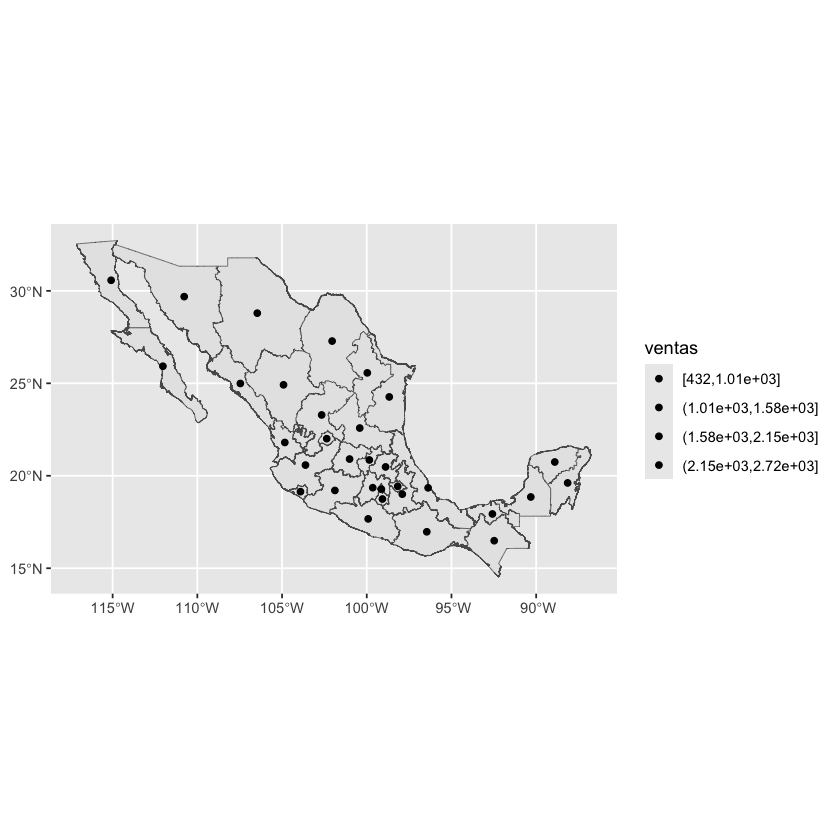

In [11]:


#Discretizandolo
ventas <- ventas %>%
    mutate(ventas = cut(Total_Ventas, breaks = 4, include.lowest = T))
ggplot() + geom_sf(data = estadosMex1)+ geom_sf(data = ventas, aes(size = ventas))

#ggplot()+ geom_sf(data=estadosMex)+ geom_sf(data=ventas,aes(size= "Total_Ventas"))

In [ ]:
#Empezando con ventas por estado

ggplot() +
    geom_sf(data = estadosMex1, aes(size = Total_Vf))